In [2]:
%load_ext autoreload
%autoreload 2
import statistics
import matplotlib.pyplot as plt
import requests
import json
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import Database
from sklearn.preprocessing import MinMaxScaler
import Music
import Database
import Indicators
import visualization
import seaborn as sns


In [12]:

indicatorDF = Database.getIndicatorDF()
indicatorDF = indicatorDF.dropna(subset='median_lyric_sentiment')
scaler = MinMaxScaler()

indicatorDF.iloc[:, 2:] = scaler.fit_transform(indicatorDF.iloc[:, 2:])
print(indicatorDF.to_string())


     sampleID         country  happiness_index  life_satisfaction  unemployment_rate  suicide_mortality_rate  educational_attainment  leisure_time  alcohol_consumption  health_expenditure  self_reported_depression  deaths_suicide_substance  perceived_health  employment_rate  social_support  life_expectancy  housing_affordability  disposable_income  homicides  median_lyric_sentiment
0           1         Finland         1.000000           1.000000           0.165796                0.477778                1.000000      1.000000             0.777317            0.454847                  0.441176                  1.000000          0.471649         0.901094        1.000000         0.897436               0.146933           0.537839   0.024735                0.530612
4           5          Israel         0.905726           0.631579           0.043140                0.107407                0.905660           NaN             0.238736            0.358838                       NaN                 

median_lyric_sentiment      1.000000
health_expenditure          0.797893
life_expectancy             0.628698
happiness_index             0.625935
self_reported_depression    0.500000
employment_rate             0.411779
social_support              0.386568
alcohol_consumption         0.332894
perceived_health            0.324337
disposable_income           0.251502
life_satisfaction           0.046610
suicide_mortality_rate     -0.015813
educational_attainment     -0.034189
unemployment_rate          -0.151299
housing_affordability      -0.335335
leisure_time               -0.485714
deaths_suicide_substance   -0.503003
homicides                  -0.540089


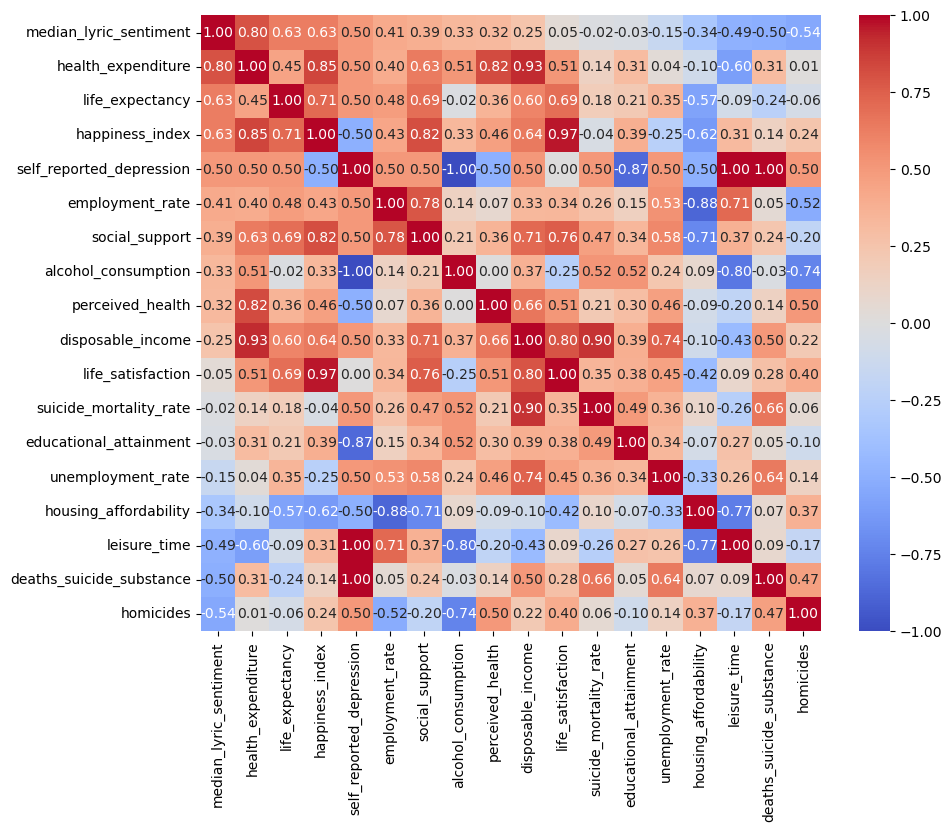

In [34]:
correlations = indicatorDF.iloc[:, 2:].corr(method='spearman')
# print(correlations.iloc[:, 2:].to_string())
feature_importance = correlations['median_lyric_sentiment'].sort_values(ascending=False)
# # print(indicatorDF.iloc[:,:2].columns)
# # print(list(feature_importance.index))
print(feature_importance.to_string())

indicatorDF = indicatorDF[list(indicatorDF.iloc[:,:2].columns) + list(feature_importance.index)]
# print(indicatorDF.iloc[:, 2:].to_string())
plt.figure(figsize=(10, 8))
sns.heatmap(indicatorDF.iloc[:, 2:].corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()
# print(indicatorDF.to_string())
indicatorDF = indicatorDF.sort_values(by='median_lyric_sentiment', ascending=True)


     sampleID         country  median_lyric_sentiment  health_expenditure  life_expectancy  happiness_index  self_reported_depression  employment_rate  social_support  alcohol_consumption  perceived_health  disposable_income  life_satisfaction  suicide_mortality_rate  educational_attainment  unemployment_rate  housing_affordability  leisure_time  deaths_suicide_substance  homicides
89         90      Mozambique                0.000000            0.000000              NaN         0.404464                       NaN              NaN             NaN             0.156741               NaN                NaN                NaN                0.414815                     NaN           0.020230                    NaN           NaN                       NaN        NaN
125       126           India                0.326531            0.002463              NaN         0.130252                       NaN              NaN             NaN             0.347488               NaN                NaN      

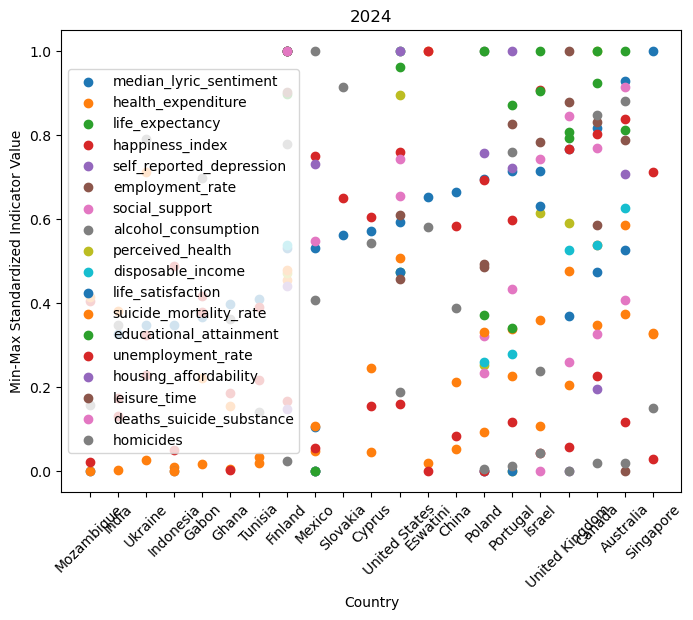

In [14]:
fig, axs = plt.subplots(1, 1, figsize=(8, 6))
plt.xticks(rotation=45)

axs.set_title("2024")
axs.set_ylabel("Min-Max Standardized Indicator Value")
axs.set_xlabel("Country")


# indicatorDF = indicatorDF.iloc[:, :8]

# indicatorDF = indicatorDF.dropna(subset='median_lyric_sentiment')

print(indicatorDF.to_string())

for index, indicator in enumerate(indicatorDF.columns[2:]):

    # X_indicator = {k: X_indicator[k] for k in X_indicator if k in medianLyricSentiment}
    axs.scatter(indicatorDF['country'], indicatorDF[indicator], label=indicator)

plt.legend()
plt.show()

            country  median_lyric_sentiment  health_expenditure
89       Mozambique                0.000000            0.000000
125           India                0.326531            0.002463
104         Ukraine                0.346939            0.027029
79        Indonesia                0.346939            0.009703
94            Gabon                0.367347            0.015822
119           Ghana                0.397959            0.004636
114         Tunisia                0.408163            0.018462
0           Finland                0.530612            0.454847
24           Mexico                0.530612            0.047304
49           Cyprus                0.571429            0.246119
22    United States                0.591837            1.000000
134        Eswatini                0.653061            0.019669
59            China                0.663265            0.052307
34           Poland                0.693878            0.093124
54         Portugal                0.714

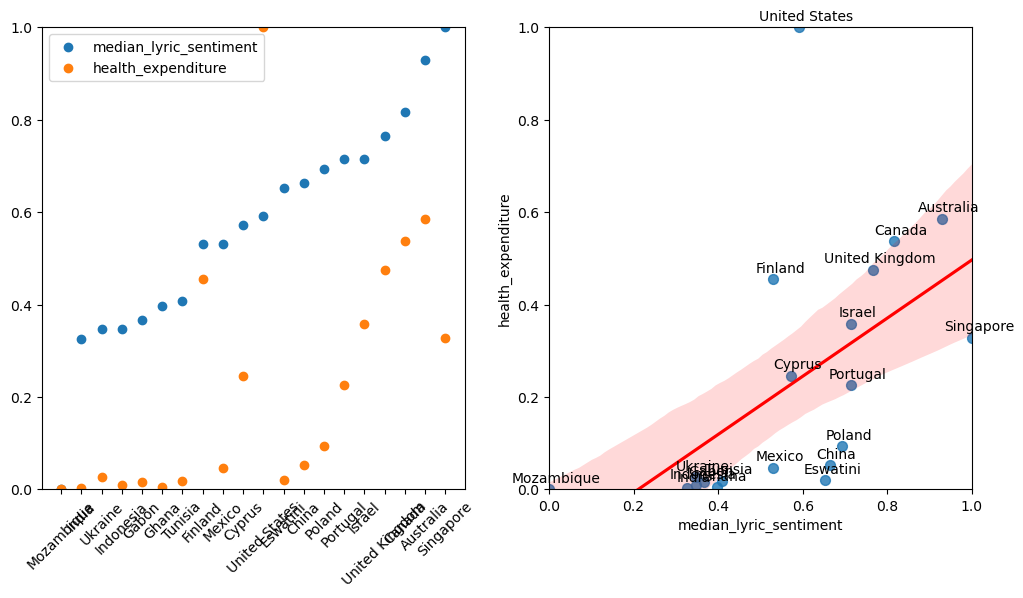

           country  median_lyric_sentiment  life_expectancy
0          Finland                0.000000         0.897436
24          Mexico                0.000000         0.000000
22   United States                0.153846         0.474359
34          Poland                0.410256         0.371795
54        Portugal                0.461538         0.871795
4           Israel                0.461538         1.000000
19  United Kingdom                0.589744         0.807692
14          Canada                0.717949         0.923077
9        Australia                1.000000         1.000000


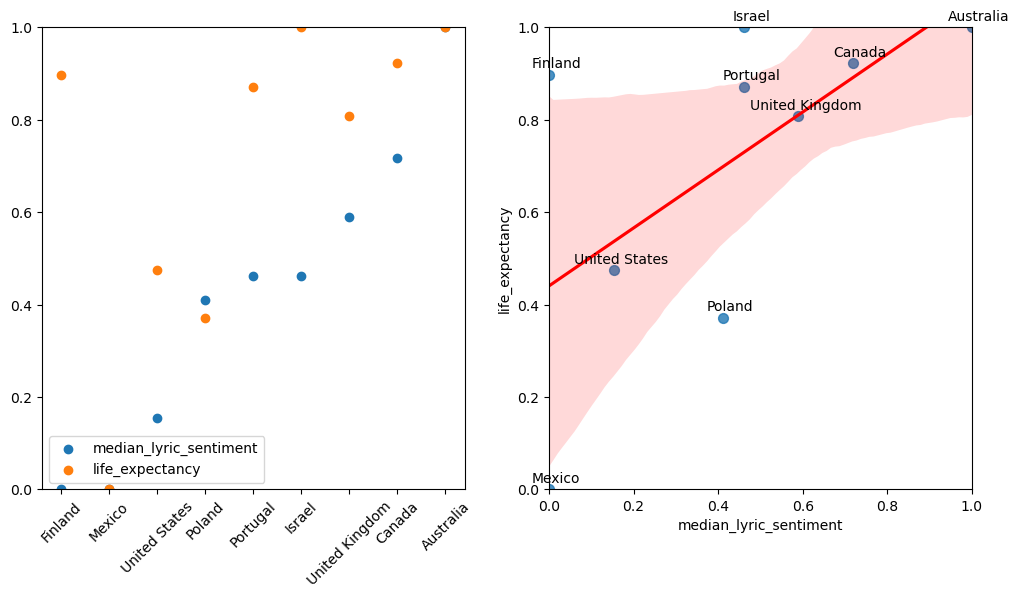

            country  median_lyric_sentiment  happiness_index
89       Mozambique                0.000000         0.404464
125           India                0.326531         0.130252
104         Ukraine                0.346939         0.323448
79        Indonesia                0.346939         0.487484
94            Gabon                0.367347         0.378489
119           Ghana                0.397959         0.185765
114         Tunisia                0.408163         0.217000
0           Finland                0.530612         1.000000
24           Mexico                0.530612         0.749286
44         Slovakia                0.561224         0.649987
49           Cyprus                0.571429         0.605398
22    United States                0.591837         0.760327
134        Eswatini                0.653061         0.000000
59            China                0.663265         0.582891
34           Poland                0.693878         0.693491
54         Portugal     

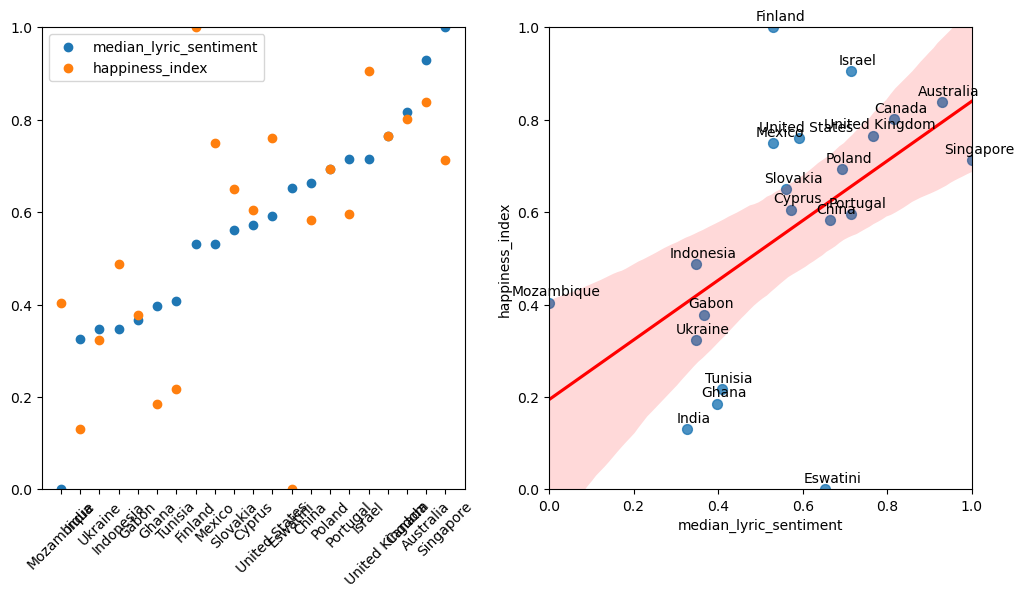

     country  median_lyric_sentiment  self_reported_depression
0    Finland                0.000000                  0.441176
34    Poland                0.888889                  0.000000
54  Portugal                1.000000                  1.000000


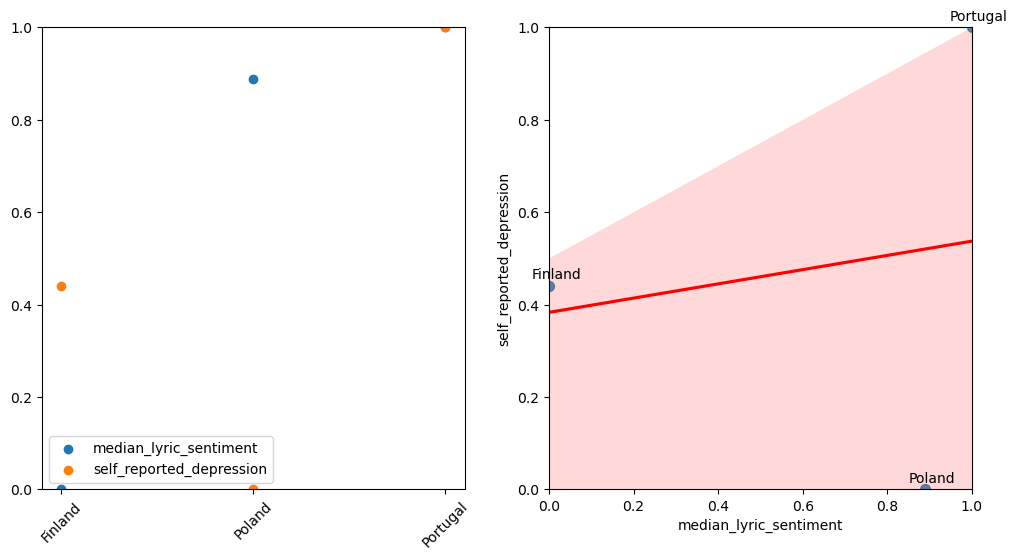

           country  median_lyric_sentiment  employment_rate
0          Finland                0.000000         0.901094
24          Mexico                0.000000         0.000000
22   United States                0.153846         0.610271
34          Poland                0.410256         0.492725
54        Portugal                0.461538         0.824822
4           Israel                0.461538         0.783167
19  United Kingdom                0.589744         1.000000
14          Canada                0.717949         0.831098
9        Australia                1.000000         0.787827


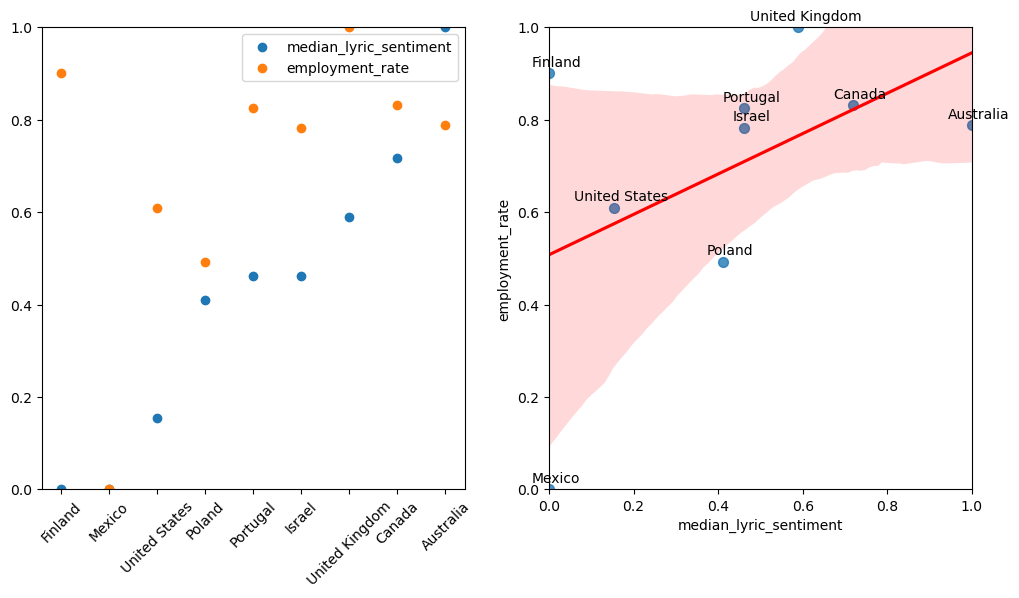

           country  median_lyric_sentiment  social_support
0          Finland                0.000000        1.000000
24          Mexico                0.000000        0.000000
22   United States                0.153846        0.655608
34          Poland                0.410256        0.322136
54        Portugal                0.461538        0.434102
4           Israel                0.461538        0.741805
19  United Kingdom                0.589744        0.845290
14          Canada                0.717949        0.769292
9        Australia                1.000000        0.913716


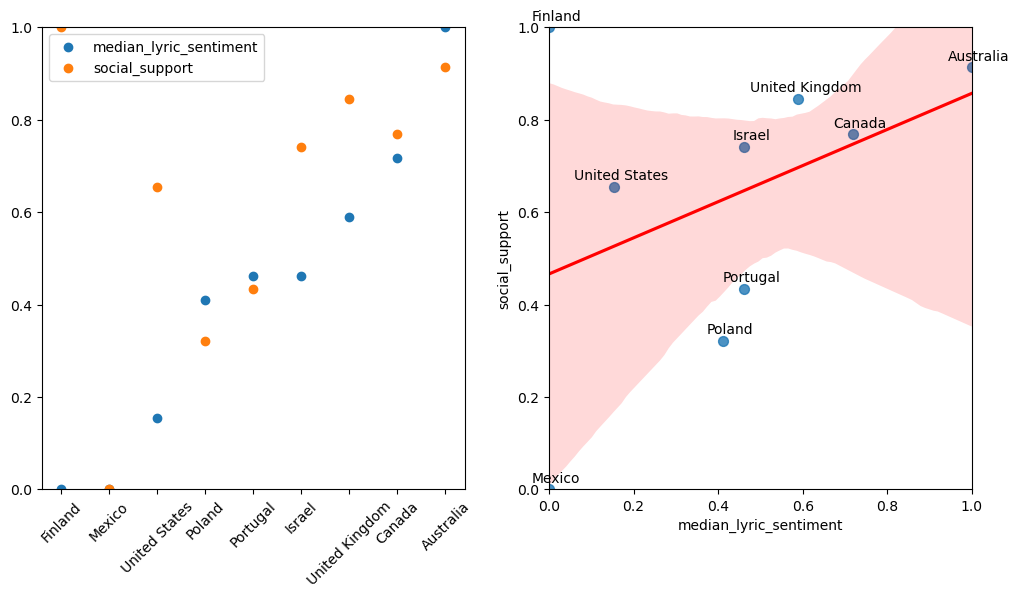

        country  median_lyric_sentiment  alcohol_consumption
89   Mozambique                0.000000             0.156741
125       India                0.326531             0.347488
104     Ukraine                0.346939             0.791127
79    Indonesia                0.346939             0.000000
94        Gabon                0.367347             0.696185
119       Ghana                0.397959             0.361298
114     Tunisia                0.408163             0.141205
0       Finland                0.530612             0.777317
24       Mexico                0.530612             0.407043
44     Slovakia                0.561224             0.914552
49       Cyprus                0.571429             0.542551
134    Eswatini                0.653061             0.579665
59        China                0.663265             0.388918
34       Poland                0.693878             1.000000
54     Portugal                0.714286             0.760055
4        Israel         

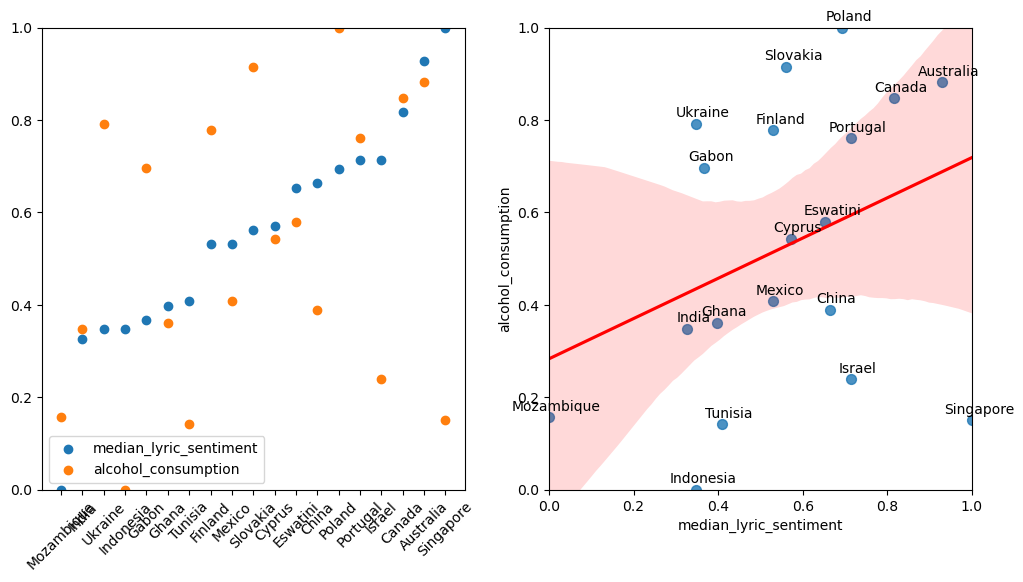

           country  median_lyric_sentiment  perceived_health
0          Finland                0.000000          0.471649
22   United States                0.214286          0.894330
34          Poland                0.571429          0.252577
54        Portugal                0.642857          0.000000
4           Israel                0.642857          0.613402
19  United Kingdom                0.821429          0.590206
14          Canada                1.000000          1.000000


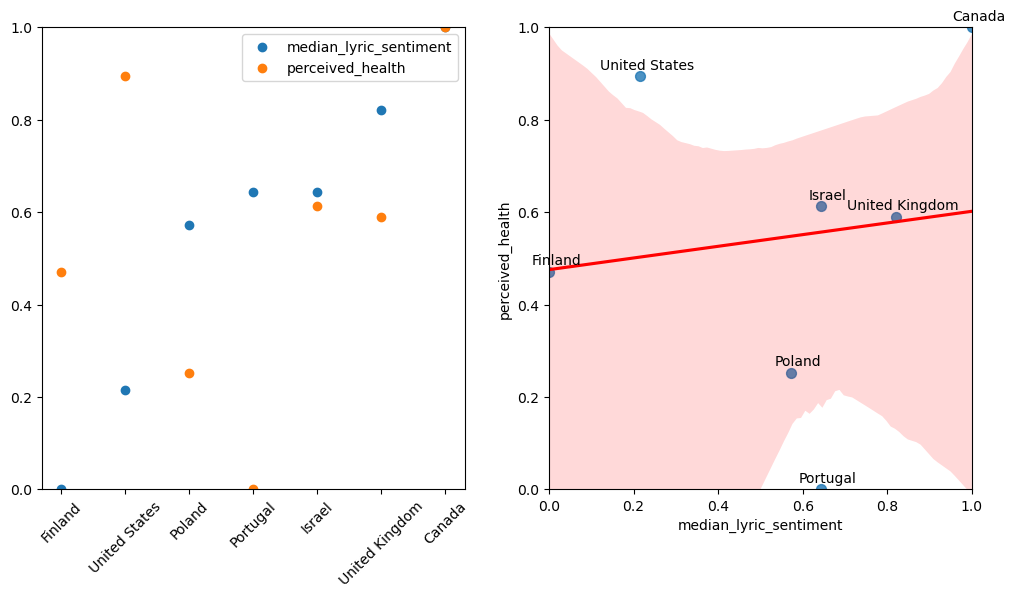

           country  median_lyric_sentiment  disposable_income
0          Finland                0.000000           0.537839
24          Mexico                0.000000           0.000000
22   United States                0.153846           1.000000
34          Poland                0.410256           0.259163
54        Portugal                0.461538           0.278014
19  United Kingdom                0.589744           0.526275
14          Canada                0.717949           0.537343
9        Australia                1.000000           0.626987


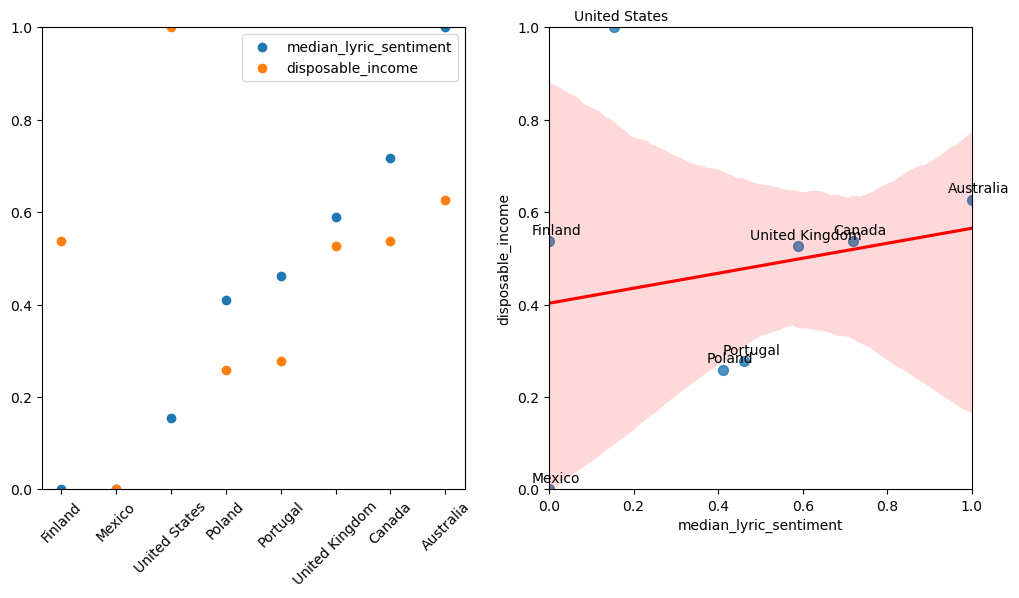

           country  median_lyric_sentiment  life_satisfaction
0          Finland                0.000000           1.000000
24          Mexico                0.000000           0.105263
22   United States                0.153846           0.473684
34          Poland                0.410256           0.000000
54        Portugal                0.461538           0.000000
4           Israel                0.461538           0.631579
19  United Kingdom                0.589744           0.368421
14          Canada                0.717949           0.473684
9        Australia                1.000000           0.526316


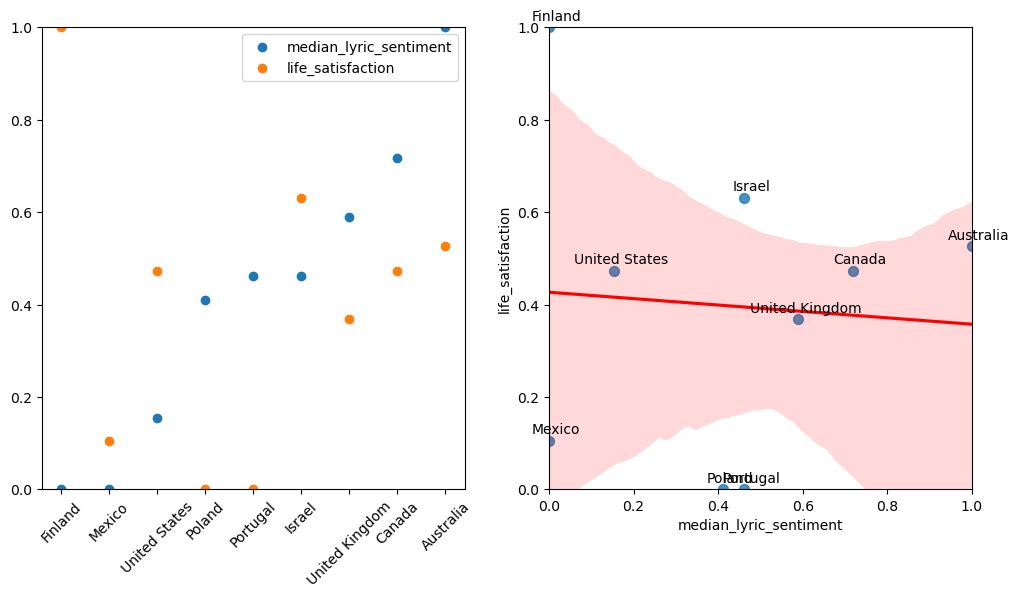

            country  median_lyric_sentiment  suicide_mortality_rate
89       Mozambique                0.000000                0.414815
125           India                0.326531                0.381481
104         Ukraine                0.346939                0.711111
79        Indonesia                0.346939                0.000000
94            Gabon                0.367347                0.222222
119           Ghana                0.397959                0.155556
114         Tunisia                0.408163                0.033333
0           Finland                0.530612                0.477778
24           Mexico                0.530612                0.107407
49           Cyprus                0.571429                0.044444
22    United States                0.591837                0.507407
134        Eswatini                0.653061                1.000000
59            China                0.663265                0.211111
34           Poland                0.693878     

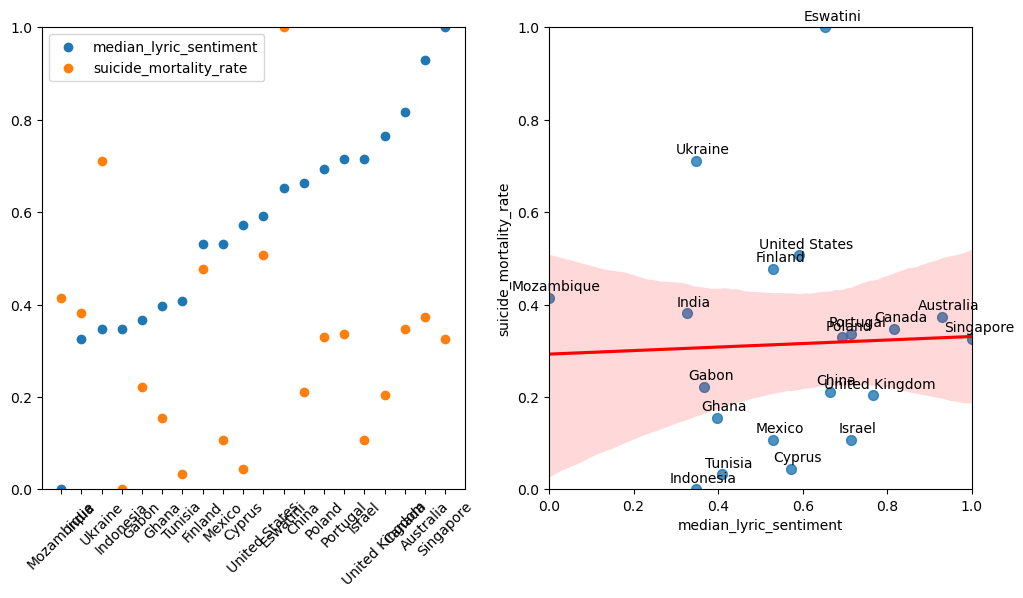

           country  median_lyric_sentiment  educational_attainment
0          Finland                0.000000                1.000000
24          Mexico                0.000000                0.000000
22   United States                0.153846                0.962264
34          Poland                0.410256                1.000000
54        Portugal                0.461538                0.339623
4           Israel                0.461538                0.905660
19  United Kingdom                0.589744                0.792453
14          Canada                0.717949                1.000000
9        Australia                1.000000                0.811321


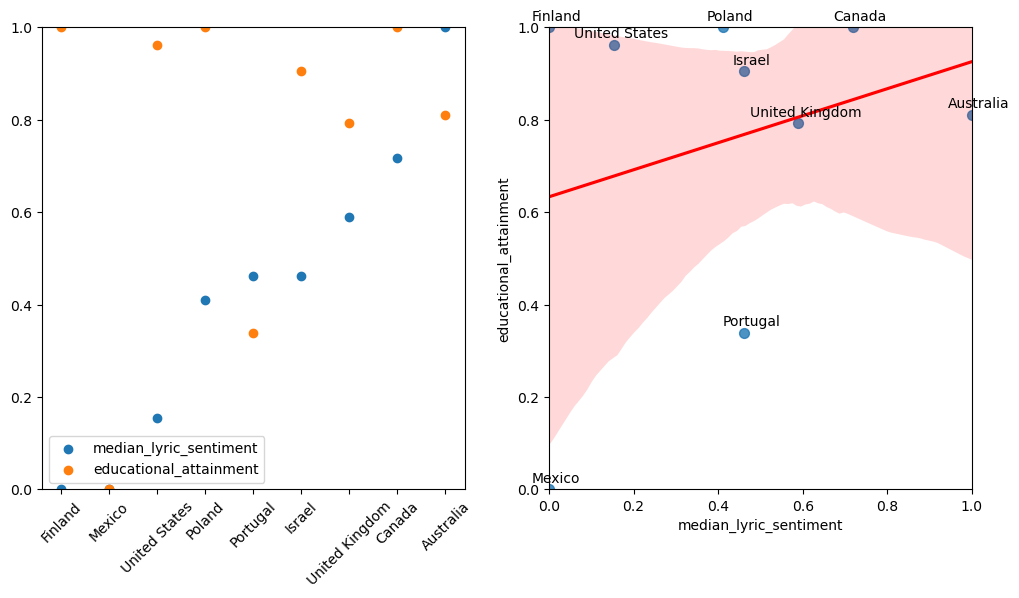

            country  median_lyric_sentiment  unemployment_rate
89       Mozambique                0.000000           0.020230
125           India                0.326531           0.173064
104         Ukraine                0.346939           0.227258
79        Indonesia                0.346939           0.050576
94            Gabon                0.367347           0.415796
119           Ghana                0.397959           0.001038
114         Tunisia                0.408163           0.389570
0           Finland                0.530612           0.165796
24           Mexico                0.530612           0.053591
49           Cyprus                0.571429           0.155580
22    United States                0.591837           0.158863
134        Eswatini                0.653061           1.000000
59            China                0.663265           0.083032
34           Poland                0.693878           0.000000
54         Portugal                0.714286           0

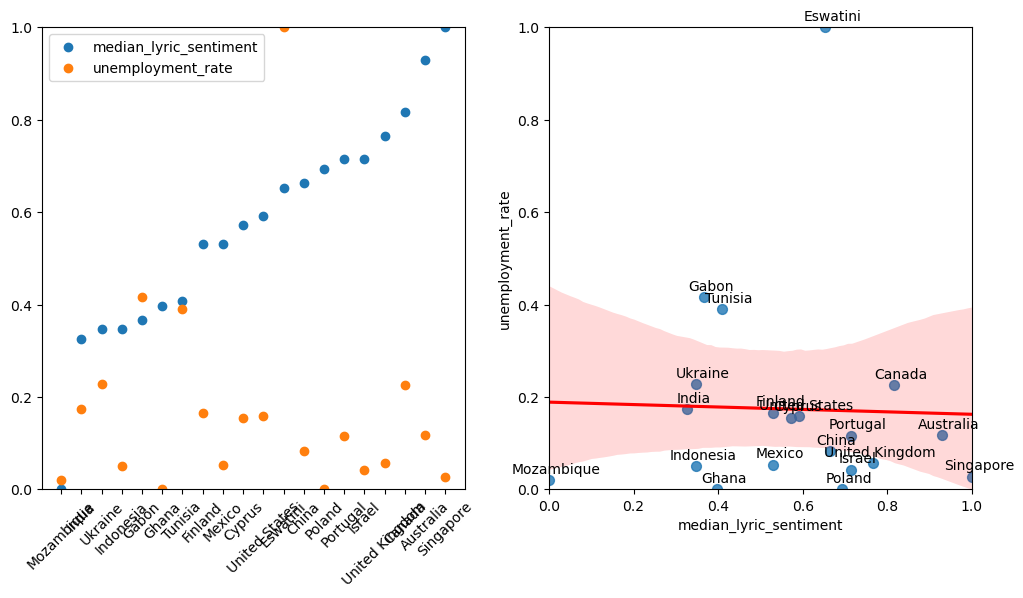

           country  median_lyric_sentiment  housing_affordability
0          Finland                0.000000               0.146933
24          Mexico                0.000000               0.730175
22   United States                0.153846               1.000000
34          Poland                0.410256               0.755709
54        Portugal                0.461538               0.720007
19  United Kingdom                0.589744               0.000000
14          Canada                0.717949               0.195465
9        Australia                1.000000               0.707875


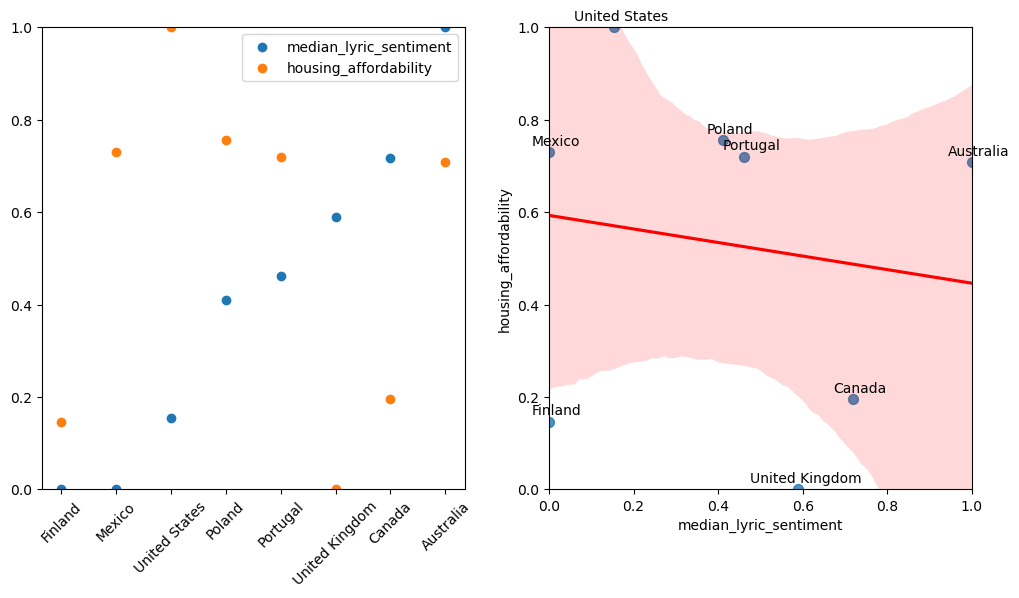

           country  median_lyric_sentiment  leisure_time
0          Finland                0.000000      1.000000
22   United States                0.153846      0.457143
34          Poland                0.410256      0.485714
19  United Kingdom                0.589744      0.878571
14          Canada                0.717949      0.585714
9        Australia                1.000000      0.000000


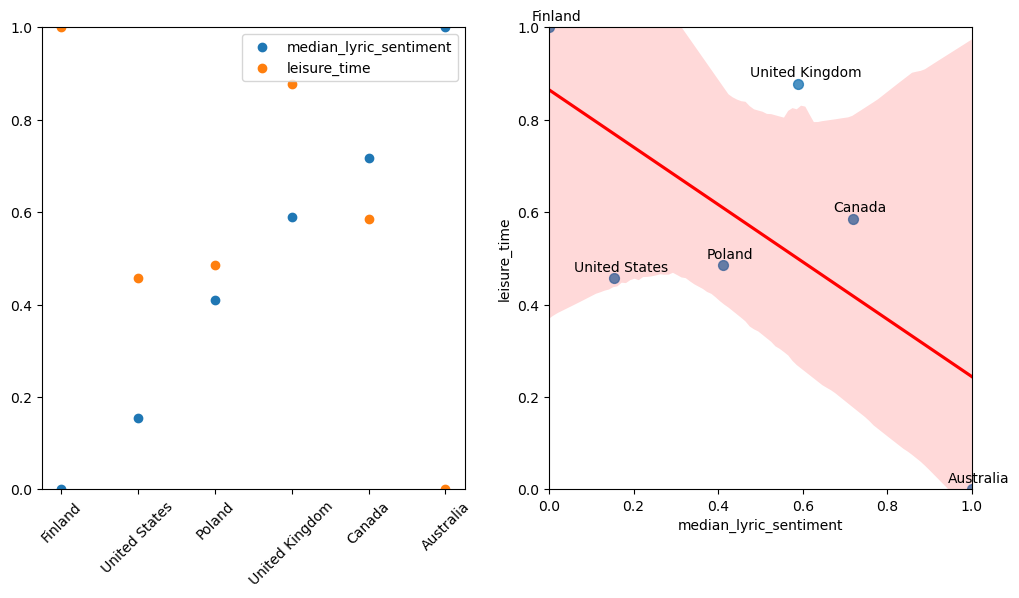

           country  median_lyric_sentiment  deaths_suicide_substance
0          Finland                0.000000                  1.000000
24          Mexico                0.000000                  0.546305
22   United States                0.153846                  0.743522
34          Poland                0.410256                  0.233605
4           Israel                0.461538                  0.000000
19  United Kingdom                0.589744                  0.258174
14          Canada                0.717949                  0.325956
9        Australia                1.000000                  0.407188


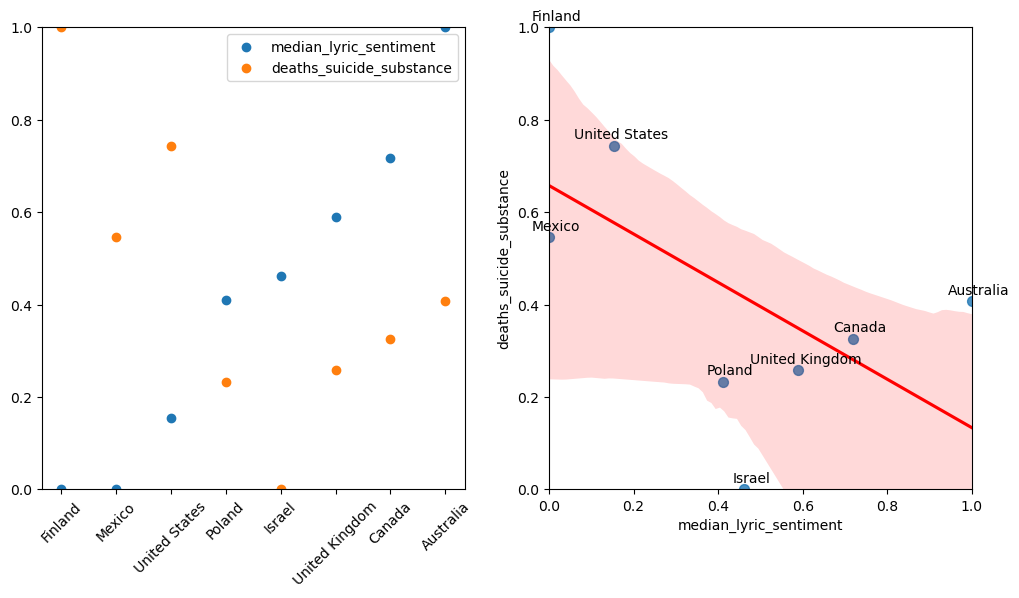

           country  median_lyric_sentiment  homicides
0          Finland                0.000000   0.024735
24          Mexico                0.000000   1.000000
22   United States                0.153846   0.187279
34          Poland                0.410256   0.003534
54        Portugal                0.461538   0.010601
4           Israel                0.461538   0.042403
19  United Kingdom                0.589744   0.000000
14          Canada                0.717949   0.017668
9        Australia                1.000000   0.017668


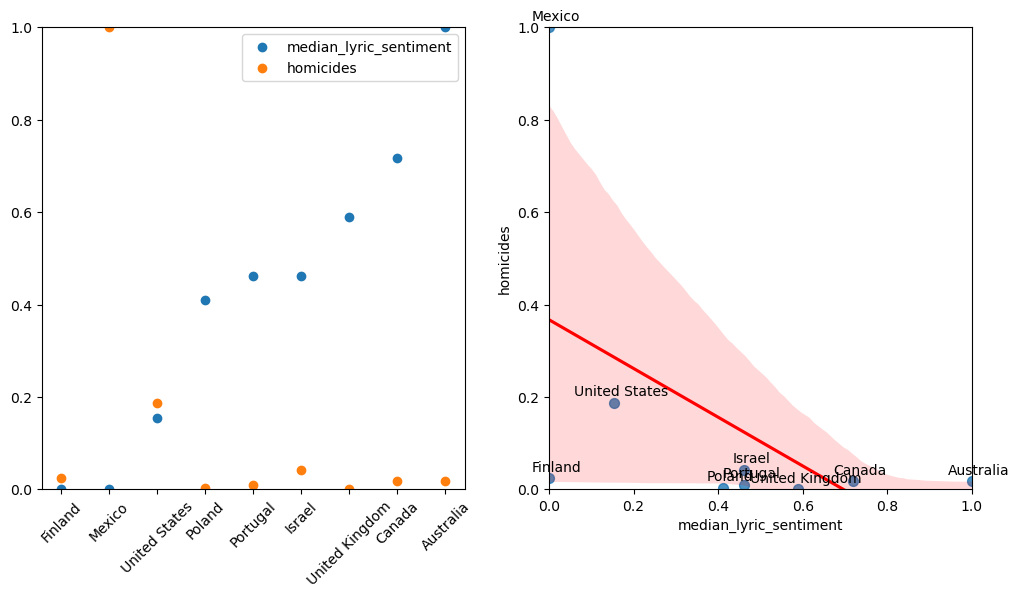

In [60]:



for indicator in indicatorDF.columns[3:]:
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    regDF = indicatorDF[['country', 'median_lyric_sentiment', indicator]].dropna()
    regDF.iloc[:, 1:] = scaler.fit_transform(regDF.iloc[:, 1:])
    print(regDF.to_string())
    # Combined Scatter plots

    axs[0].scatter(regDF['country'], regDF['median_lyric_sentiment'], label="median_lyric_sentiment")
    axs[0].scatter(regDF['country'], regDF[indicator], label=indicator)
    axs[0].set_ylim(0, 1)
    axs[0].set_xticks(regDF['country'])
    axs[0].set_xticklabels(regDF['country'], rotation=45)
    # axs[0].title(indicator)
    axs[0].legend()

    # Regression Plots
    sns.regplot(x='median_lyric_sentiment', y=indicator, data=regDF, line_kws={'color': 'red'}, scatter_kws={'s': 50}, ax=axs[1])
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    for i in range(len(regDF)):
        plt.annotate(regDF['country'].iloc[i], (regDF['median_lyric_sentiment'].iloc[i], regDF[indicator].iloc[i]), textcoords="offset points", xytext=(5, 5), ha='center')
    plt.show()